# Automatyzacja pracy z danymi przestrzennymi w Pythonie i GeoPandas

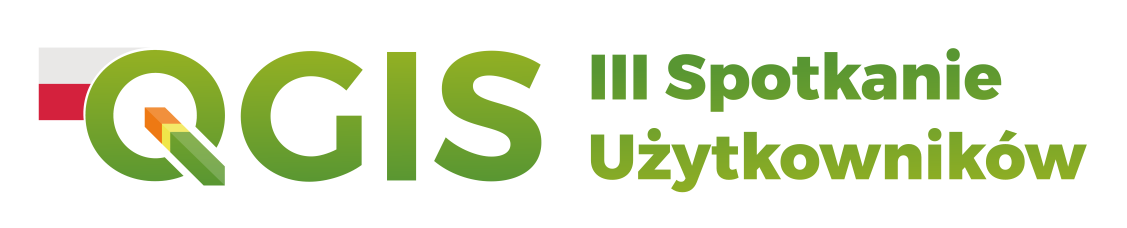

## Meta


- **Prowadzący**: Szymon Moliński (Digitree SA)
- **Data**: 2024-06-26
- **Miejsce**: Poznań
- **Część**: 4

# Operacje przestrzenne, łączenie po kolumnie z geometrią

W tym przykładzie poznamy API do przeprowadzania przestrzennych operacji znanych z algebry zbiorów, na przykład znajdowanie części wspólnych i rozłącznych obszarów. Dodatkowo poznamy złączenia przestrzenne (`spatial join`) i inne typy złączeń znane z przestrzennych i relacyjnych baz danych.

In [ ]:
import geopandas as gpd

In [ ]:
dpath = "zip:///content/drive/MyDrive/geopandas-workshops/"

ds1 = "nybbwi_20d.zip!nybbwi_20d/nybbwi.shp"
ds2 = "nysd_20d.zip!nysd_20d/nysd.shp"

districts_path = dpath + ds1
schools_path = dpath + ds2

In [ ]:
nyd = gpd.read_file(districts_path)
nys = gpd.read_file(schools_path)

<Axes: >

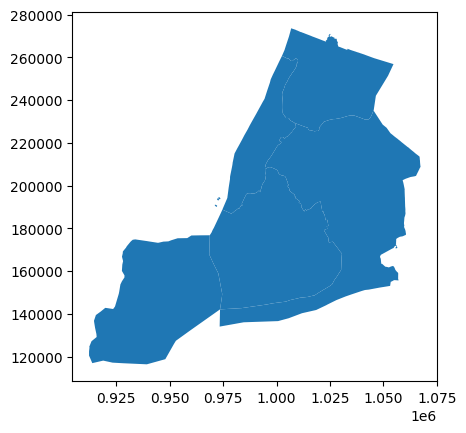

In [ ]:
nyd.plot()

<Axes: >

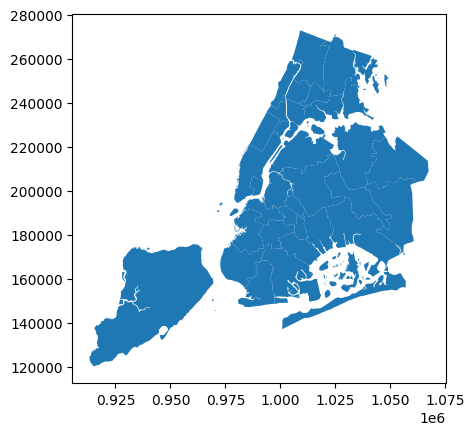

In [ ]:
nys.plot()

In [ ]:
nyd.crs == nys.crs

True

In [ ]:
nyd.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,2,Bronx,188054.198841,1.598380e+09,"POLYGON ((1021632.336 267934.439, 1022108.577 ..."
2,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
3,4,Queens,429586.630985,3.858050e+09,"POLYGON ((1045438.075 235083.296, 1049675.845 ..."
4,5,Staten Island,212213.139971,2.539686e+09,"POLYGON ((968762.067 175987.749, 968654.251 17..."


In [ ]:
nys.head()

,SchoolDist,Shape_Leng,Shape_Area,geometry
0,1,28641.223059,3.516033e+07,"POLYGON ((992073.467 203714.076, 992068.667 20..."
1,10,94956.718074,2.825410e+08,"POLYGON ((1020767.838 268271.133, 1020752.058 ..."
2,11,305035.869503,3.932277e+08,"MULTIPOLYGON (((1042822.450 243439.814, 104255..."
3,12,48578.087537,6.909795e+07,"POLYGON ((1016662.949 248181.796, 1016897.339 ..."
4,13,86634.820950,1.048708e+08,"POLYGON ((990055.507 196472.349, 990004.946 19..."


## Algebra zbiorów a dane przestrzenne

Do dalszej analizy wydzielimy obszar dzielnicy Brooklyn i zaczniemy obserwować jak działa algebra zbiorów na danych przestrzennych.

### Zadanie

Stwórz nową ramkę danych `brooklyn`, która będzie wywodzić się z `nyd` gdzie `BoroName` jest równe `Brooklyn`.

In [ ]:
brooklyn = nyd[nyd['BoroName'] == "Brooklyn"]

<Axes: >

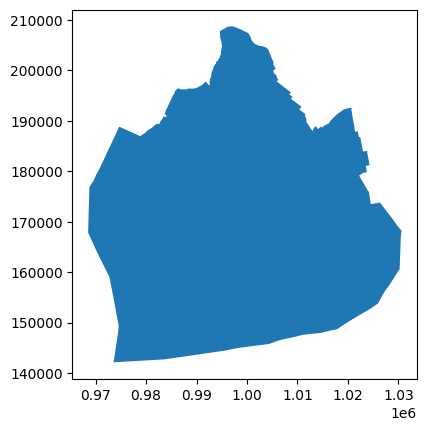

In [ ]:
brooklyn.plot()

## Operacje przestrzenne

- iloczyn (`intersection`) albo część wspólna dzielnicy Brooklyn i dystryktów szkolnych,
- suma (`union`) dzielnicy Brooklyn i dystryktów szkolnych,
- różnica symetryczna (`symmetric_difference`) między Brooklyn a dystryktami szkolnymi,
- różnica między dystryktami szkolnymi a Brooklynem.

In [ ]:
# iloczyn

area_intersection = gpd.overlay(brooklyn, nys, how='intersection', keep_geom_type=False)

In [ ]:
area_intersection.head()

,BoroCode,BoroName,Shape_Leng_1,Shape_Area_1,SchoolDist,Shape_Leng_2,Shape_Area_2,geometry
0,3,Brooklyn,234928.658563,2.684411e+09,13,86634.820950,1.048708e+08,"POLYGON ((983822.462 191677.056, 983897.776 19..."
1,3,Brooklyn,234928.658563,2.684411e+09,14,95607.545074,1.502956e+08,"POLYGON ((1005307.792 199418.119, 1005557.696 ..."
2,3,Brooklyn,234928.658563,2.684411e+09,15,153453.530575,1.961542e+08,"POLYGON ((978961.111 186932.162, 979000.003 18..."
3,3,Brooklyn,234928.658563,2.684411e+09,16,35848.904082,4.676362e+07,"POLYGON ((1003004.900 192621.499, 1003126.192 ..."
4,3,Brooklyn,234928.658563,2.684411e+09,17,68341.203801,1.284413e+08,"POLYGON ((1006320.818 181792.022, 1006335.500 ..."


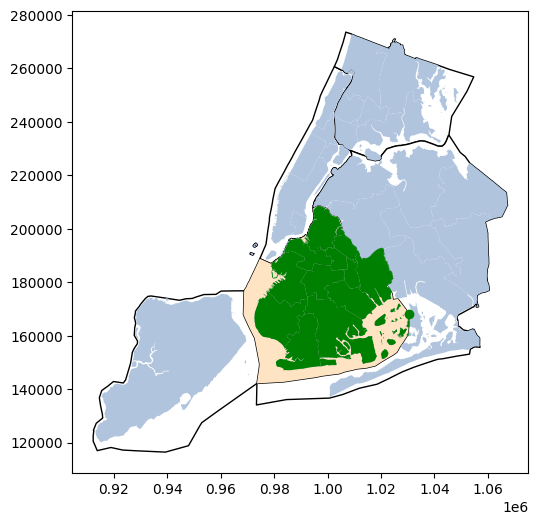

In [ ]:
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque');
nys.plot(ax=base, color='lightsteelblue');
area_intersection.plot(ax=base, color='green');

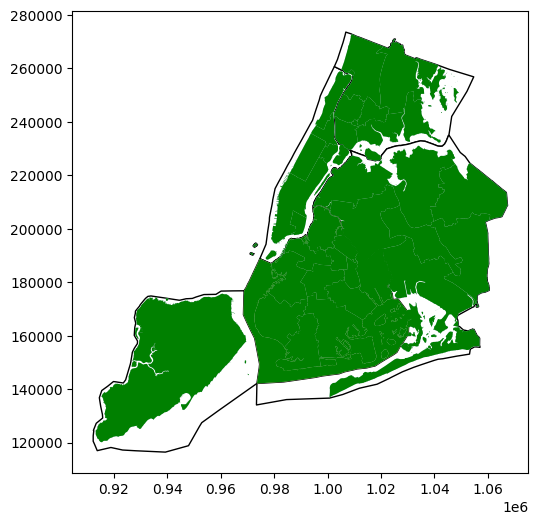

In [ ]:
# suma

area_union = gpd.overlay(brooklyn, nys, how='union', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque');
nys.plot(ax=base, color='lightsteelblue');
area_union.plot(ax=base, color='green');

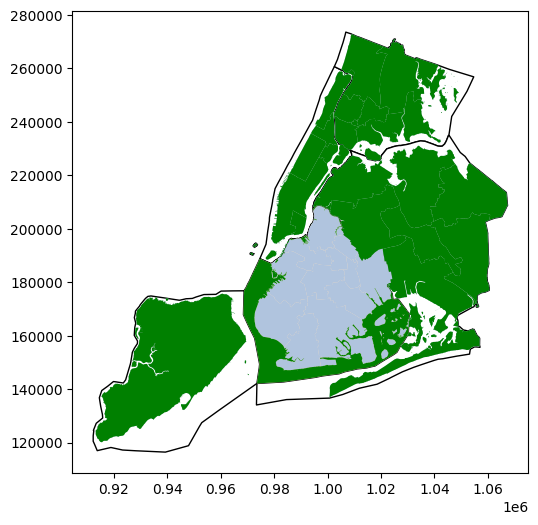

In [ ]:
# symmetric difference

area_sym_diff = gpd.overlay(brooklyn, nys, how='symmetric_difference', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque');
nys.plot(ax=base, color='lightsteelblue');
area_sym_diff.plot(ax=base, color='green');

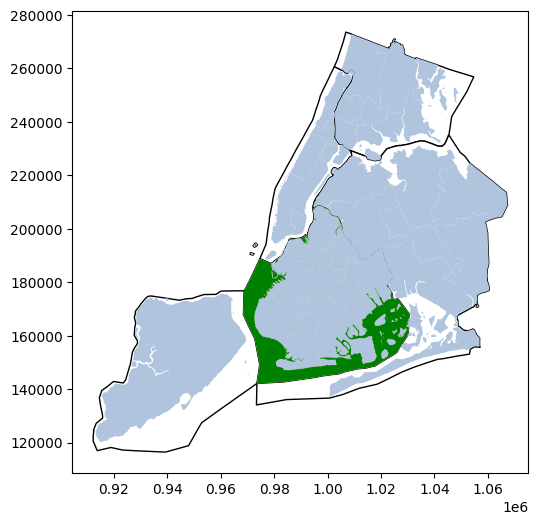

In [ ]:
# difference

area_diff = gpd.overlay(brooklyn, nys, how='difference', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque');
nys.plot(ax=base, color='lightsteelblue');
area_diff.plot(ax=base, color='green');

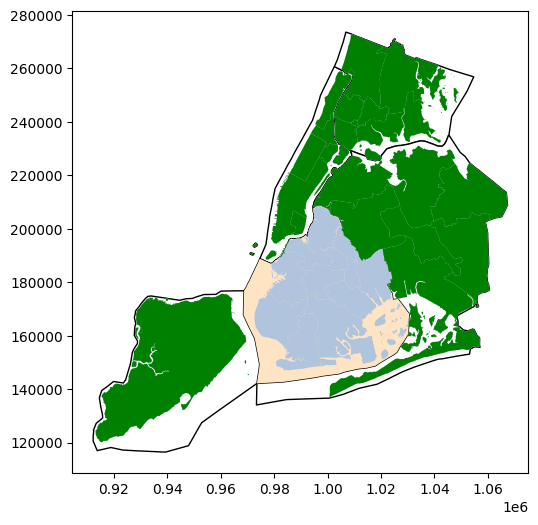

In [ ]:
# difference 2

area_diff_2 = gpd.overlay(nys, brooklyn, how='difference', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque');
nys.plot(ax=base, color='lightsteelblue');
area_diff_2.plot(ax=base, color='green');

## Przestrzenne złączenia

Przestrzenne złączenia to bardzo przydatne operacje. Kiedy *jedyną* relacją między danymi jest ich położenie, nie mamy dostępu do żadnych indeksów, wtedy korzystamy z metod przestrzennego złączenia. Pokażemy to na przykładzie wcześniej eksplorowanego zbioru cen najmu krótkoterminowego AirBnB w Nowym Jorku.

`GeoPandas` oferuje kilka metod przestrzennego złączenia, wypróbujemy każdą z nich:

- `pandas.concat()`: dodawanie nowych wierszy albo kolumn do danych
- `merge()`: łączenie danych bazujące na wartościach z kolumn, z jednym zastrzeżeniemL: jeśli przyłączamy `DataFrame` do `GeoDataFrame` to wynikowo mamy `GeoDataFrame`. W odwrotnej sytuacji tracimy informacje przestrzenne i zostajemy z klasyczną ramką danych!
- `sjoin()`: przestrzenne złączenie.
- `sjoin_nearest()`: dołącza bliskie geometrie.


### `concat()`

In [ ]:
manhattan = nyd[nyd['BoroName'] == 'Manhattan'].copy()

In [ ]:
manhattan  # pierwszy obiekt

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."


In [ ]:
bcent = brooklyn.centroid

In [ ]:
import pandas as pd

In [ ]:
conc = pd.concat([manhattan, bcent])

In [ ]:
conc

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,0
0,1.0,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",None
2,NaN,NaN,NaN,NaN,None,POINT (998185.377 170520.846)


<Axes: >

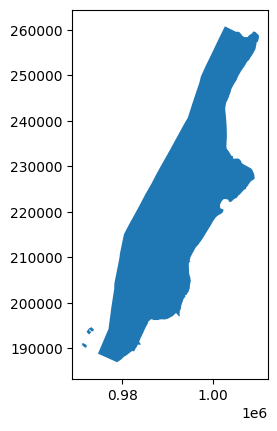

In [ ]:
conc.plot()

In [ ]:
# Nie ma naszego punktu! Trzeba nieco zmodyfikować dane przed złączeniem, zadbać o nazwę kolumny z geometrią

In [ ]:
bcent = gpd.GeoDataFrame(bcent, columns=['geometry'])

In [ ]:
bcent

,geometry
2,POINT (998185.377 170520.846)


In [ ]:
conc = pd.concat([manhattan, bcent])

In [ ]:
conc

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1.0,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
2,NaN,NaN,NaN,NaN,POINT (998185.377 170520.846)


<Axes: >

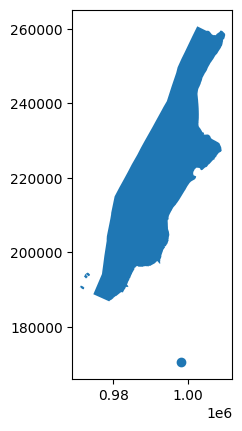

In [ ]:
conc.plot()

### `merge()`

Operacja `merge()` jest bardziej skomplikowana niż `concat()` ponieważ wymaga podania nazw kolumn, gdzie wspólne wartości będą używane do złączenia dwóch tabel. Spróbujemy złączyć tabelę z apartamentami w Nowym Jorku z danymi przestrzennymi - dzielnicami - wykorzystując do tego nazwę dzielnicy.

In [ ]:
path_airbnb = "/content/drive/MyDrive/geopandas-workshops/AB_NYC_2019.csv"
df = pd.read_csv(path_airbnb, index_col="id")

In [ ]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Połącz używając `neighbourhood_group` i `BoroName`

1. Najpierw `DataFrame`, później `GeoDataFrame`

In [ ]:
merged_left_df = df.merge(nyd, left_on='neighbourhood_group', right_on='BoroName')

In [ ]:
merged_left_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
1,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
2,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
3,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
4,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."


In [ ]:
type(merged_left_df)

pandas.core.frame.DataFrame

2. Najpierw `GeoDataFrame` a później `DataFrame`

In [ ]:
merged_left_gdf = nyd.merge(df, left_on='BoroName', right_on='neighbourhood_group')
type(merged_left_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Nie robimy plot! Tam jest wiele zduplikowanych geometrii! Można to obejść odrzucając duplikaty.

<Axes: >

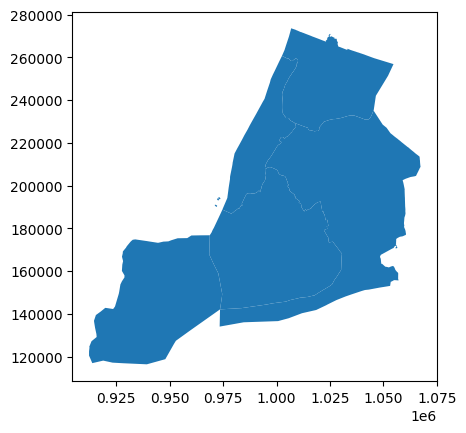

In [ ]:
merged_left_gdf.drop_duplicates('BoroName')['geometry'].plot()

### `sjoin()`

Złączenie przestrzenne jest sednem używania `GeoPandas` zamiast `Pandas`, czy przestrzennych baz danych zamiast prostych relacyjnych systemów. System łączy ze sobą wiersze bazując na informacjach o zależności między geometriami, najważniejsze z zależności to:

- `intersects` - czy geometrie się przecinają
- `contains` - czy geometria zawiera inną geometrię
- `within` - czy geometria jest wewnątrz innej geometrii (nie liczy się granica!)
- `touches` - czy granice obiektów się stykają
- `crosses` - czy geometrie się przecinają
- `overlaps` - czy geometrie nakładają się na siebie

(Źródło: https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates)

Złączenie przestrzenne zwraca indeksy do geometrii która spełnia dany warunek, dlatego lepiej sprawdzać relacje tej innej geometrii do prostych typów geometrii (nie przechowujemy wtedy w pamięci nadmiarowych danych).

In [ ]:
from geopandas import points_from_xy


points = points_from_xy(x=df['longitude'], y=df['latitude'], crs="EPSG:4326")
df['geo'] = points
gdf = gpd.GeoDataFrame(df)

In [ ]:
gdf.set_geometry('geo', inplace=True)

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
nyd.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf.to_crs(nyd.crs, inplace=True)

In [ ]:
# sjoin

In [ ]:
apartments = gpd.sjoin(gdf, manhattan, how="left", predicate='within')

In [ ]:
apartments

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geo,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
id,,,,,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,...,2018-10-19,0.21,6,365,POINT (991917.303 175175.655),NaN,NaN,NaN,NaN,NaN
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,2019-05-21,0.38,2,355,POINT (988746.648 213841.186),0.0,1.0,Manhattan,203803.216852,9.442947e+08
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,...,NaN,NaN,1,365,POINT (1000333.670 234030.203),0.0,1.0,Manhattan,203803.216852,9.442947e+08
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,2019-07-05,4.64,1,194,POINT (995410.267 188893.967),NaN,NaN,NaN,NaN,NaN
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,2018-11-19,0.10,1,0,POINT (999757.550 230200.664),0.0,1.0,Manhattan,203803.216852,9.442947e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,...,NaN,NaN,2,9,POINT (998132.374 186487.156),NaN,NaN,NaN,NaN,NaN
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,...,NaN,NaN,2,36,POINT (1002780.164 194982.774),NaN,NaN,NaN,NaN,NaN
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,...,NaN,NaN,1,27,POINT (998458.326 236116.675),0.0,1.0,Manhattan,203803.216852,9.442947e+08


In [ ]:
len(apartments)

48895

In [ ]:
apartments.dropna(inplace=True)

In [ ]:
len(apartments)

16621

<Axes: >

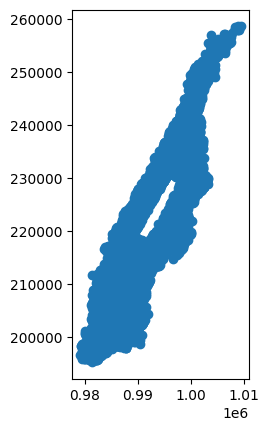

In [ ]:
apartments.plot()

<Axes: >

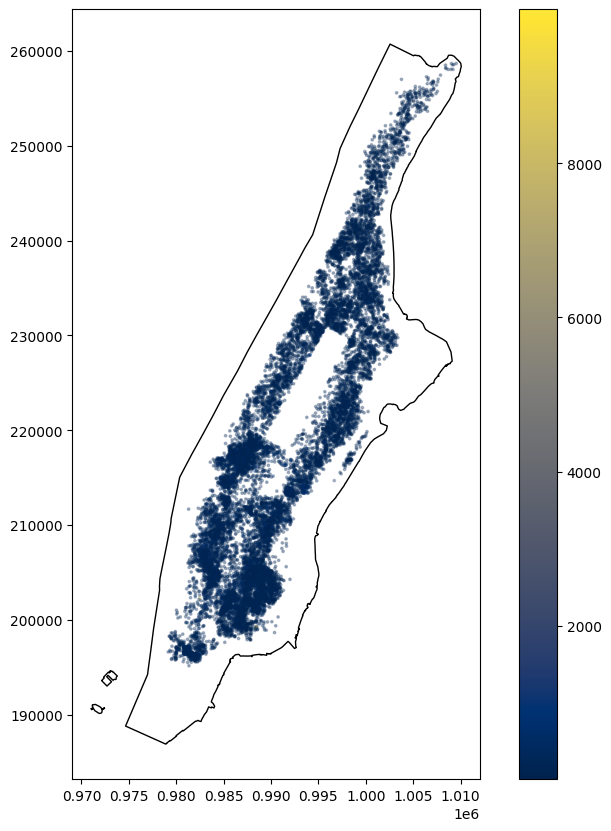

In [ ]:
base = manhattan.plot(figsize=(10, 10), color='white', edgecolor='black');
apartments.plot(ax=base, alpha=0.3, column='price', legend=True, cmap='cividis', markersize=3)